In [1]:
import os
import workspace_path
os.chdir(workspace_path.path)

## 加载数据集图片

In [2]:
img_path = 'data/Watermelon87_Semantic_Seg_Mask/img_dir/train/04_35-2.jpg'
mask_path = 'data/Watermelon87_Semantic_Seg_Mask/ann_dir/train/04_35-2.png'

(668, 1000, 3)


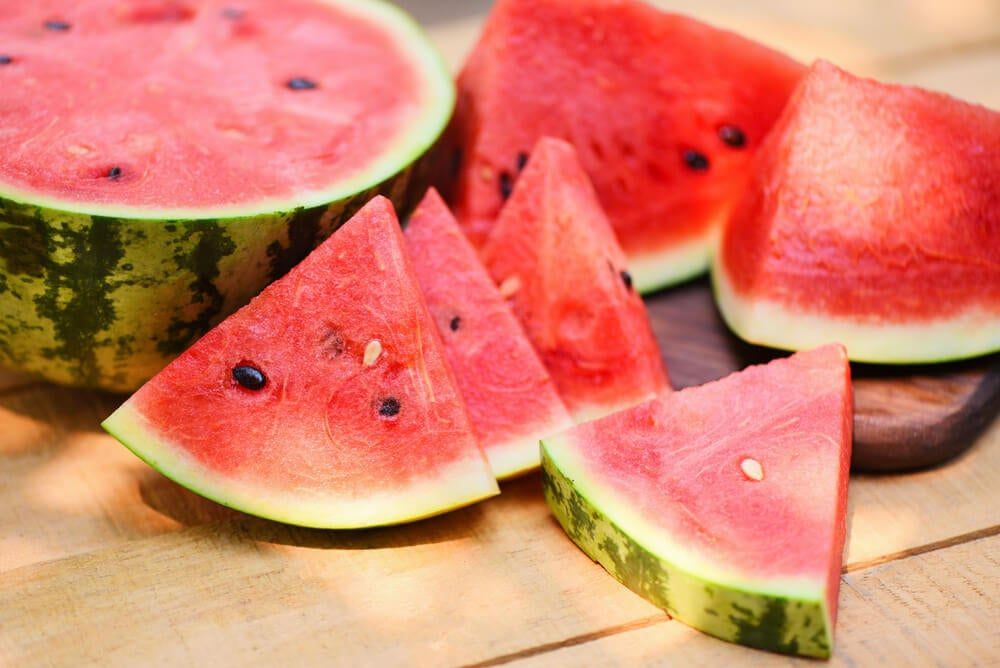

In [3]:
from PIL import Image
import cv2
img = cv2.imread(img_path)
print(img.shape)
Image.open(img_path)

(668, 1000, 3)


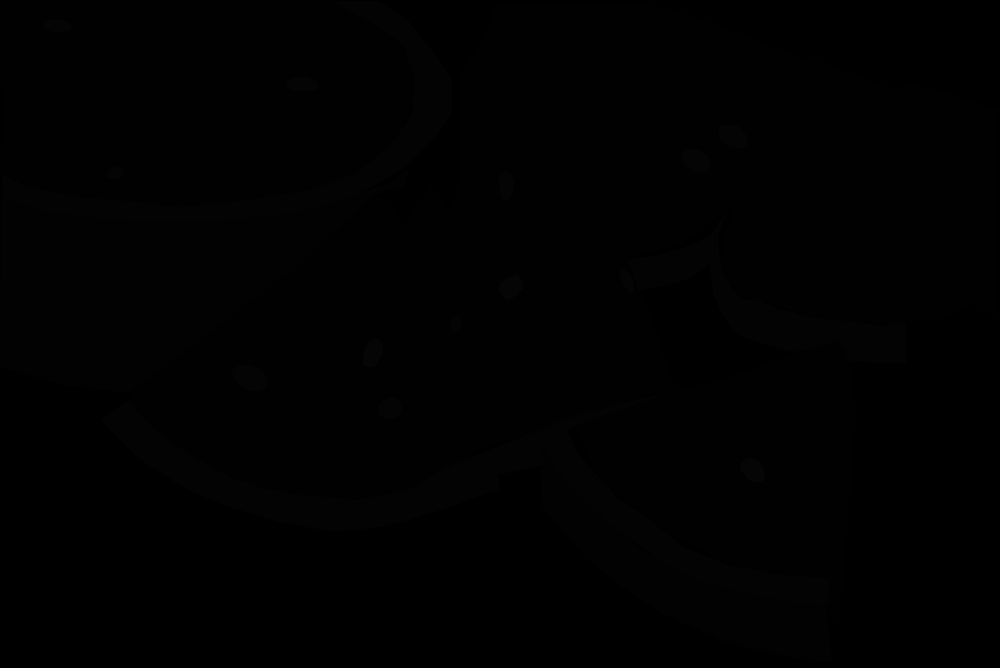

In [4]:
mask = cv2.imread(mask_path)
print(mask.shape)
Image.open(mask_path)

## mask灰度图的含义

In [5]:
# mask 语义分割标注，与原图大小相同, 共五种类型的标注
import numpy as np
np.unique(mask)
print('因此共五种类型的标注')

因此共五种类型的标注


| 类别编号 | 类别名称   |
| -------- | ---------- |
| 0        | background       |
| 1        | red       |
| 2        | green   |
| 3        | white |
| 4        | seed-black      |
| 5        | seed-white  |

## 将语义分割标注叠加在原图上显示

In [6]:
# 每个类别的 BGR 配色
palette = [
    ['background', [127,127,127]],
    ['red', [0,0,200]],
    ['green', [0,200,0]],
    ['white', [144,238,144]],
    ['seed-black', [30,30,30]],
    ['seed-white', [8,189,251]]
]
palette_dict = {}
for idx, each in enumerate(palette):
    palette_dict[idx] = each[1]
palette_dict

{0: [127, 127, 127],
 1: [0, 0, 200],
 2: [0, 200, 0],
 3: [144, 238, 144],
 4: [30, 30, 30],
 5: [8, 189, 251]}

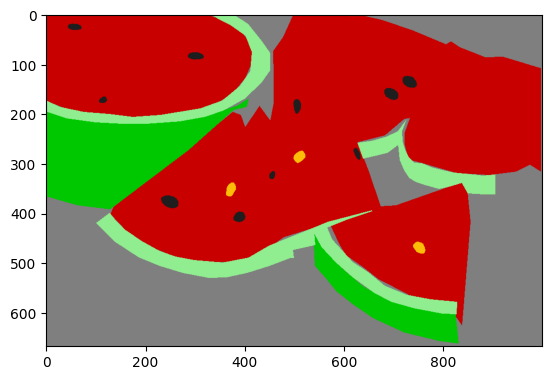

In [7]:
# 将mask中的标注映射为对应类别的颜色
import matplotlib.pyplot as plt
viz_mask_bgr = np.zeros((img.shape))
for idx in palette_dict.keys():
    viz_mask_bgr[np.where(mask[:,:,0]==idx)] = palette_dict[idx]
viz_mask_bgr = viz_mask_bgr.astype('uint8')
plt.imshow(viz_mask_bgr[:,:,::-1])
plt.show()

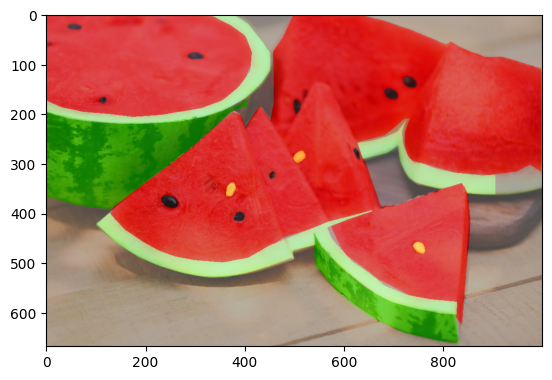

In [8]:
# 将语义分割标注图和原图叠加显示
opacity = 0.45 # 透明度越大，可视化效果越接近原图
label_viz = cv2.addWeighted(img, opacity, viz_mask_bgr, 1-opacity, 0)
plt.imshow(label_viz[:,:,::-1])
plt.show()


## 批量可视化图像和标注

In [9]:
# 指定图像和标注路径
PATH_IMAGE = 'data/Watermelon87_Semantic_Seg_Mask/img_dir/train'
PATH_MASKS = 'data/Watermelon87_Semantic_Seg_Mask/ann_dir/train'

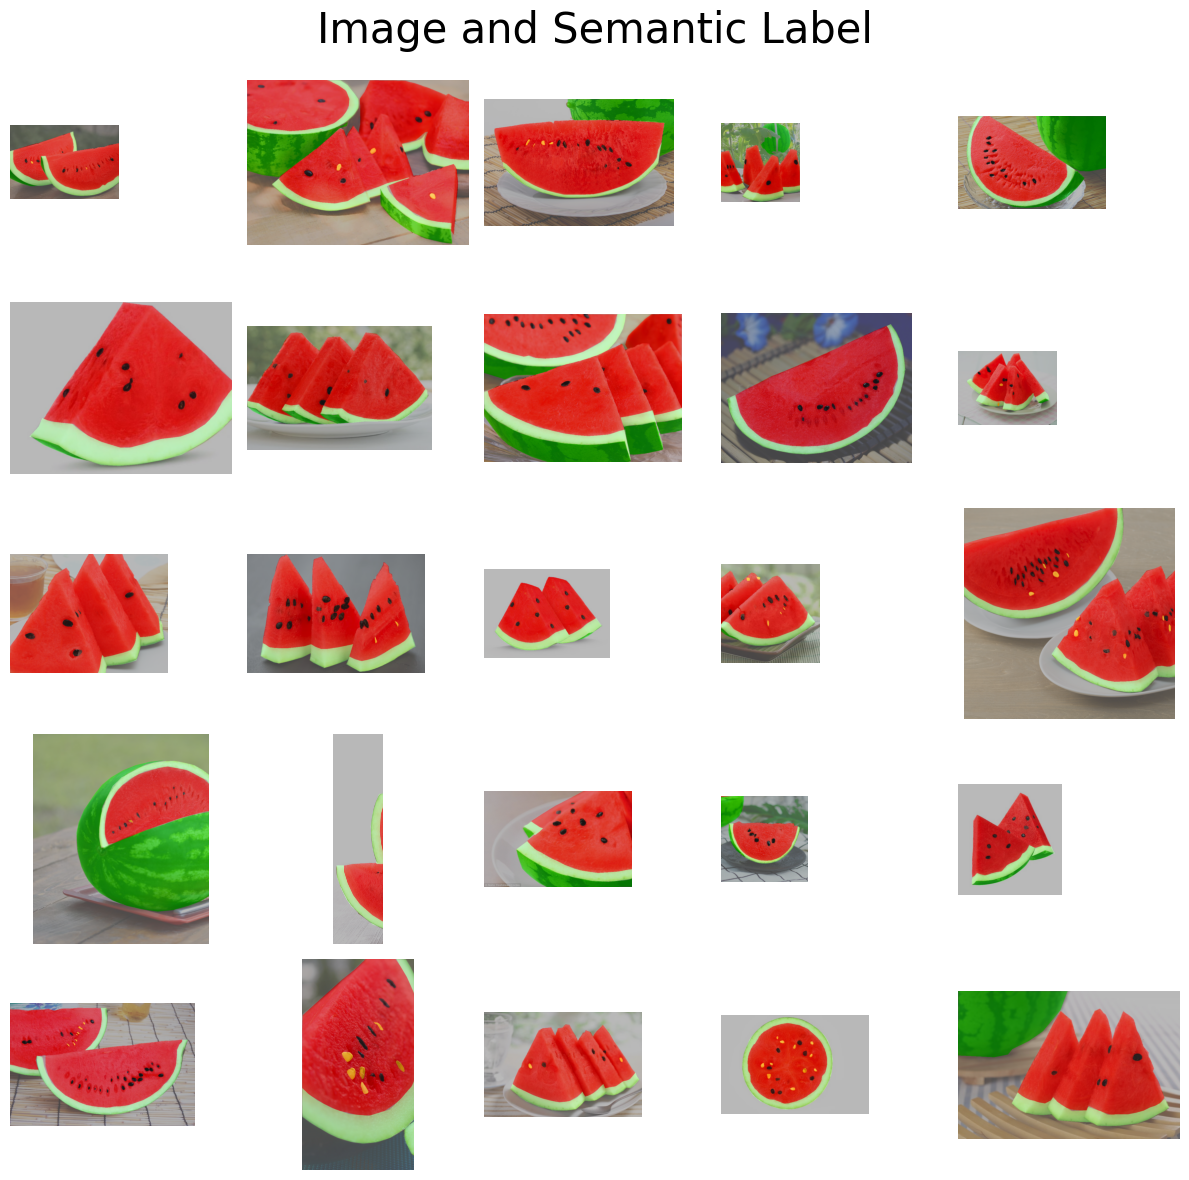

In [10]:
# n 行 n 列可视化
n = 5
# 透明度越大，可视化效果越接近原图
opacity = 0.45

fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(12,12))

for i, file_name in enumerate(os.listdir(PATH_IMAGE)[:n**2]):
    
    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name.split('.')[0]+'.png')
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    mask = mask[:,:,0]

    # 将预测的整数ID，映射为对应类别的颜色
    viz_mask_bgr = np.zeros((mask.shape[0], mask.shape[1], 3))
    for idx in palette_dict.keys():
        viz_mask_bgr[np.where(mask==idx)] = palette_dict[idx]
    viz_mask_bgr = viz_mask_bgr.astype('uint8')

    # 将语义分割标注图和原图叠加显示
    label_viz = cv2.addWeighted(img, opacity, viz_mask_bgr, 1-opacity, 0)
    
    # 可视化
    axes[i//n, i%n].imshow(label_viz[:,:,::-1])
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('Image and Semantic Label', fontsize=30)
plt.tight_layout()
plt.show()